In [24]:
# Import all relevant libraries for the task in the assignment
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [25]:
# Initializing the Data Paths relevant
DATA_PATH = '../data/DayAheadPrices_12.1.D/*.csv'
DATA_PATH1 = '../data/PhysicalFlows_12.1.G/*.csv' 

In [26]:
# Use glob to get all files from the data paths
price_files = glob.glob(DATA_PATH)
flow_files = glob.glob(DATA_PATH1)

TASK 1:

In [27]:
#Initializze list to store all relevant data
no2_dataframes = []
for f in price_files:
    #Read each CSV file with the correct Delimiter, in this case tab
    csv = pd.read_csv(f, delimiter = '\t') 
    #Filter the rows where the mapcode is NO2 (Our relevant norwegian price zone)
    csv = csv[csv['MapCode'] == 'NO2']
    #Select only relevant columns
    csv = csv[['DateTime', 'Price']]
    csv.rename(columns = {'DateTime' : 'Date', 'Price' : 'Price'}, inplace = True)
    #Append this to the list of dataframes
    no2_dataframes.append(csv)

#Concatenate all NO2 data into a single dataframe
no2_data = pd.concat(no2_dataframes, ignore_index = True)
#Making sure the date column is in the right date format
no2_data['Date'] = pd.to_datetime(no2_data['Date'])
#To check that the output is right, compare result from tail to actual csv files
no2_data.tail()

,Date,Price
43819,2023-12-31 10:00:00,63.01
43820,2023-12-31 14:00:00,63.53
43821,2023-12-31 18:00:00,62.88
43822,2023-12-31 22:00:00,59.31
43823,2023-12-31 23:00:00,53.79


In [28]:
#Doing the same procedure for collecting relevant German data
ger_dataframes = []
for f in price_files:
    csv = pd.read_csv(f, delimiter = '\t') 
    csv = csv[csv['MapCode'] == 'DE_LU']
    csv = csv[['DateTime', 'Price']]
    csv.rename(columns = {'DateTime' : 'Date', 'Price' : 'Price'}, inplace = True)
    
    ger_dataframes.append(csv)


ger_data = pd.concat(ger_dataframes, ignore_index = True)
ger_data['Date'] = pd.to_datetime(ger_data['Date'])

ger_data.tail()

,Date,Price
116875,2023-12-30 18:15:00,73.52
116876,2023-12-30 19:15:00,60.56
116877,2023-12-30 20:15:00,59.63
116878,2023-12-30 21:15:00,47.55
116879,2023-12-30 22:15:00,47.47


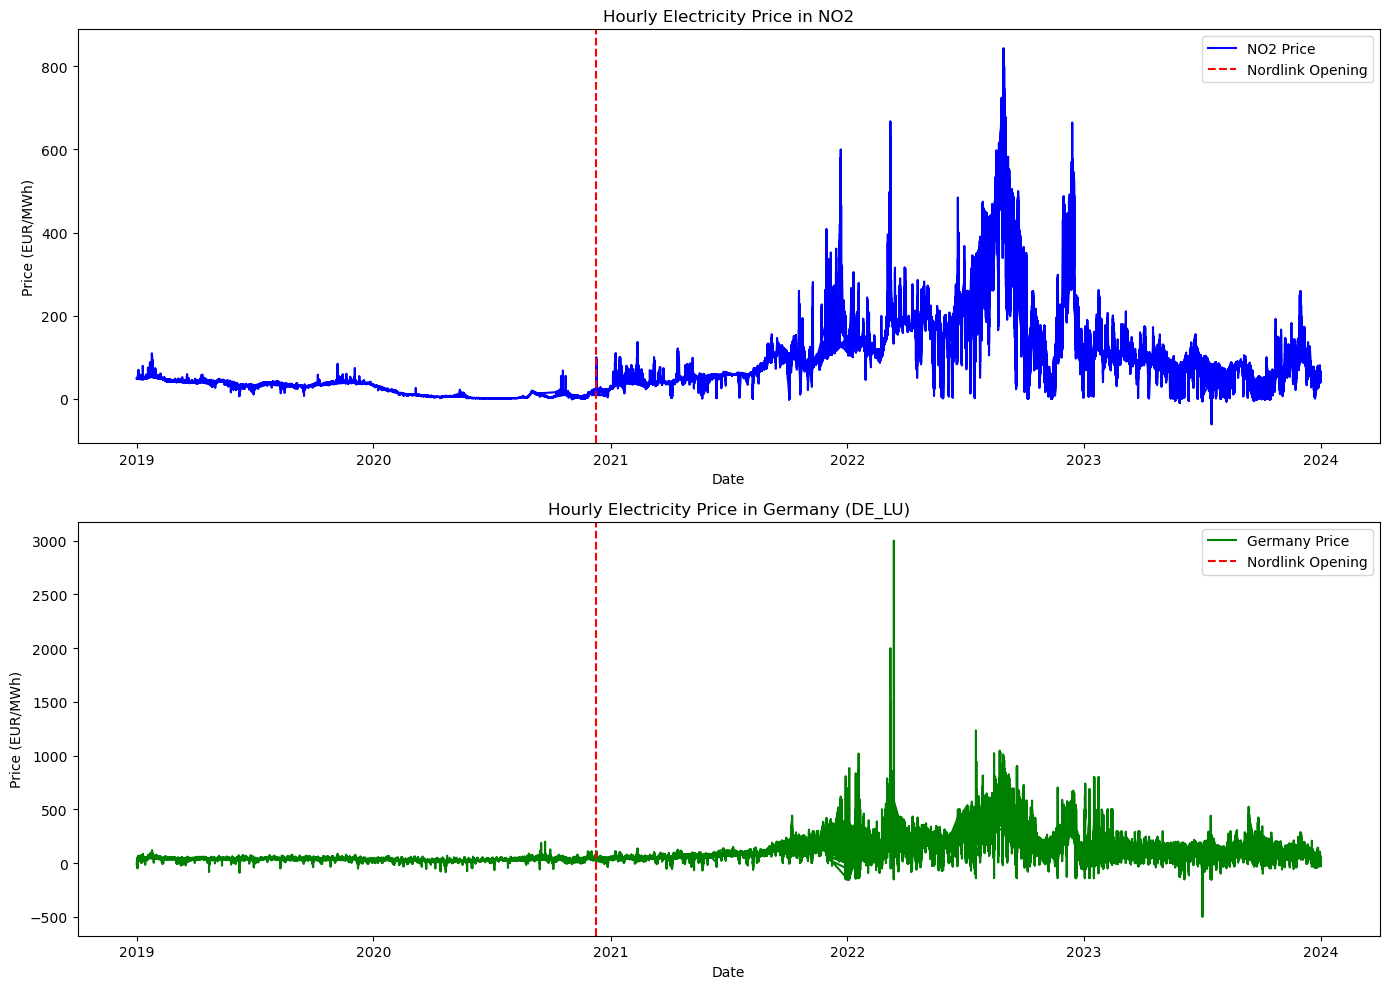

In [29]:
#Merge data on Date to ensure alignment (optional if already aligned)
#merged_data = pd.merge(no2_data, ger_data, on='Date', suffixes=('_NO2', '_DE_LU'))

# Plotting
plt.figure(figsize=(14, 10))

# NO2 Price subplot
plt.subplot(2, 1, 1)
# Making date as the x axis and price as the y axis, as well as coloring and labelling
plt.plot(no2_data['Date'], no2_data['Price'], color='blue', label='NO2 Price')
# Creating the line for when Nordlink was opened.
plt.axvline(pd.Timestamp('2020-12-09'), color='red', linestyle='--', label='Nordlink Opening')
#Creating titles and labels for the axis'
plt.title('Hourly Electricity Price in NO2')
plt.xlabel('Date')
plt.ylabel('Price (EUR/MWh)')
plt.legend()

#Germany price subplot, doing same procedure as above
plt.subplot(2, 1, 2)
plt.plot(ger_data['Date'], ger_data['Price'], color='green', label='Germany Price')
plt.axvline(pd.Timestamp('2020-12-09'), color='red', linestyle='--', label='Nordlink Opening')
plt.title('Hourly Electricity Price in Germany (DE_LU)')
plt.xlabel('Date')
plt.ylabel('Price (EUR/MWh)')
plt.legend()

#Making the graphs more easy to read and removes overlap
plt.tight_layout()
plt.savefig('figure_task1.png')
plt.show()

Conclusion: 

After analyzing electricity prices in NO2 and Germany, we observe overall increased price alignment following the opening of Nordlink, December 9, 2020, which is a result of improved cross-border balancing of energy. Electricity prices varied independently prior to Nordlink, however, these prices seem more synchronized after the opening, meaning that this cable has facilitated for more supply and demand adjustments. Despite all of this, as the subplots show, both countries are experiencing price spikes, which is highly likely due to the recent European energy crisis. The countries experienced most variation in the same timeframe, which also underscores the fact that prices became increasinly similar after Nordlink's deployment. 
The prices in NO2 have increased after the opening of Nordlink, and we can see a stable (or even slightly decrease) electricity price in Germany. This may be a result of greater exposure to European prices for Norway (E.G. fuel prices), while Germany has benefited from a stabilizing effect that has helped them contain their prices. 

Negative electricity prices can occur when a country has an oversupply of electricity during periods with low demand. This situation is often made worse by subsidies or rules that encourage renewable energy producers to keep generating power even when demand is low, since stopping and restarting production can be costly and inefficient. 

TASK 2:

In [30]:
no2_dataframes = []
for f in price_files:
    csv = pd.read_csv(f, delimiter = '\t') 
    csv = csv[csv['MapCode'] == 'NO2']
    csv = csv[['DateTime', 'Price']]
    csv.rename(columns = {'DateTime' : 'Date', 'Price' : 'Price'}, inplace = True)
    no2_dataframes.append(csv)

no2_data = pd.concat(no2_dataframes, ignore_index = True)
no2_data['Date'] = pd.to_datetime(no2_data['Date'])

In [31]:
#Doing the same procedure as above for collecting relevant German data
ger_dataframes = []
for f in price_files:
    csv = pd.read_csv(f, delimiter = '\t') 
    csv = csv[csv['MapCode'] == 'DE_LU']
    csv = csv[['DateTime', 'Price']]
    csv.rename(columns = {'DateTime' : 'Date', 'Price' : 'Price'}, inplace = True)
    
    ger_dataframes.append(csv)


ger_data = pd.concat(ger_dataframes, ignore_index = True)
ger_data['Date'] = pd.to_datetime(ger_data['Date'])

In [32]:
# Extract year from DateTime in both created dataframes and add it as a new column
no2_data['Year'] = no2_data['Date'].dt.year
ger_data['Year'] = ger_data['Date'].dt.year

In [33]:
#Initialize an empty list to store our results, enabling us to create a new dataframe later...

results = []
# NB! Keeping all calculations and code inside the for loop to get stats for each year
for year in range(2019, 2024):
    # Filter relevant data for the specific years
    yearly_no2 = no2_data[no2_data['Year'] == year]['Price']
    yearly_ger = ger_data[ger_data['Year'] == year]['Price']

#Creating two dictionaries to store the calculated statistics for the specific years in NO2 and Germany, rounding to two decimals
    stats_no2 = {
        'Year' : year,
        'Country' : 'NO2', 
        'Mean' : round(yearly_no2.mean(), 2),
        'Median' : round(yearly_no2.median(), 2),
        'Std Dev' : round(yearly_no2.std(), 2),
        'Min' : round(yearly_no2.min(), 2), 
        'Max' : round(yearly_no2.max(), 2)
}

    stats_ger = {
        'Year' : year,
        'Country' : 'Germany', 
        'Mean' : round(yearly_ger.mean(), 2),
        'Median' : round(yearly_ger.median(), 2),
        'Std Dev' : round(yearly_ger.std(), 2),
        'Min' : round(yearly_ger.min(), 2), 
        'Max' : round(yearly_ger.max(), 2)    
    }

    #Appending all results from dictionaries to the initialized list
    results.append(stats_no2)
    results.append(stats_ger)

results

[{'Year': 2019,
  'Country': 'NO2',
  'Mean': 39.26,
  'Median': 38.81,
  'Std Dev': 8.23,
  'Min': 5.86,
  'Max': 109.45},
 {'Year': 2019,
  'Country': 'Germany',
  'Mean': 37.67,
  'Median': 38.06,
  'Std Dev': 15.52,
  'Min': -90.01,
  'Max': 121.46},
 {'Year': 2020,
  'Country': 'NO2',
  'Mean': 9.29,
  'Median': 6.95,
  'Std Dev': 8.26,
  'Min': -1.73,
  'Max': 99.92},
 {'Year': 2020,
  'Country': 'Germany',
  'Mean': 30.47,
  'Median': 30.99,
  'Std Dev': 17.5,
  'Min': -83.94,
  'Max': 200.04},
 {'Year': 2021,
  'Country': 'NO2',
  'Mean': 75.11,
  'Median': 59.34,
  'Std Dev': 47.22,
  'Min': -1.97,
  'Max': 600.16},
 {'Year': 2021,
  'Country': 'Germany',
  'Mean': 130.41,
  'Median': 90.44,
  'Std Dev': 104.8,
  'Min': -149.99,
  'Max': 809.5},
 {'Year': 2022,
  'Country': 'NO2',
  'Mean': 211.28,
  'Median': 181.13,
  'Std Dev': 125.85,
  'Min': 0.04,
  'Max': 844.0},
 {'Year': 2022,
  'Country': 'Germany',
  'Mean': 237.1,
  'Median': 208.53,
  'Std Dev': 148.24,
  'Min': -

In [34]:
#Creating a dataframe for the statistics we calculated above
stats_df = pd.DataFrame(results)
stats_df

,Year,Country,Mean,Median,Std Dev,Min,Max
0,2019,NO2,39.26,38.81,8.23,5.86,109.45
1,2019,Germany,37.67,38.06,15.52,-90.01,121.46
2,2020,NO2,9.29,6.95,8.26,-1.73,99.92
3,2020,Germany,30.47,30.99,17.50,-83.94,200.04
4,2021,NO2,75.11,59.34,47.22,-1.97,600.16
5,2021,Germany,130.41,90.44,104.80,-149.99,809.50
6,2022,NO2,211.28,181.13,125.85,0.04,844.00
7,2022,Germany,237.10,208.53,148.24,-149.99,2999.99
8,2023,NO2,79.44,80.45,36.28,-61.84,261.85
9,2023,Germany,95.07,95.90,59.16,-500.00,800.00


In [35]:
#Export the dataframe into an excel file
stats_df.to_excel('table_task2.xlsx')

Conclusion: 
By looking into the columns for the years after NordLink was deployed (2021,2022), we see that the electricity prices overall has increased rapidly. The 'std dev' column and the widening of 'min' and 'max' reflects this.
The average prices in both NO2 and Germany have generally trended upwards. For instance, the mean price for NO2 increases from 39.26 in 2019 to a peak of 211.28 in 2022, while Germany’s mean price rises from 37.67 in 2019 to 237.10 in 2022. This shows a extreme growing trend in both regions. 

Germany’s volatility (standard deviation) and extremes (min and max values) are slightly higher than in NO2, especially in 2022, where the maximum price reaches nearly 3000 and the minimum is a large negative value (-149.99). This might be due to Germany’s shift from more stable energy sources like oil, gas, and nuclear power to less consistent renewable sources like wind and solar.

TASK 3:

In [36]:
#Initializing empty list to store all files
dataframes = []
for f in flow_files:
    csv = pd.read_csv(f, delimiter = '\t')
    dataframes.append(csv)
#Concatenating all files into one dataframe
flowdata = pd.concat(dataframes, ignore_index = True)
flowdata

,DateTime,InMapCode,OutMapCode,FlowValue
0,2019-01-01 00:00:00,AL,GR,173.00
1,2019-01-01 01:00:00,AL,GR,145.00
2,2019-01-01 02:00:00,AL,GR,145.00
3,2019-01-01 03:00:00,AL,GR,133.00
4,2019-01-01 04:00:00,AL,GR,130.00
...,...,...,...,...
14402341,2023-12-31 19:00:00,XK,RS,418.85
14402342,2023-12-31 20:00:00,XK,RS,411.11
14402343,2023-12-31 21:00:00,XK,RS,485.37
14402344,2023-12-31 22:00:00,XK,RS,469.40


In [37]:
# Convert datetime to datetime, Extract the year, enabling us to work with the annual sums later
flowdata['DateTime'] = pd.to_datetime(flowdata['DateTime'])
flowdata['Year'] = flowdata['DateTime'].dt.year
#Filter relevant rows, in this case only when NO2 and Germany are InMap or OutMap
#Separate data for imports and exports for NO2 to/from Germany
imports = flowdata[(flowdata['InMapCode'] == 'NO2') & (flowdata['OutMapCode'] == 'DE_LU')]
exports = flowdata[(flowdata['OutMapCode'] == 'NO2') & (flowdata['InMapCode'] == 'DE_LU')]

#Calculating annual sums of imports and exports
annual_imports = imports.groupby('Year')['FlowValue'].sum()
annual_exports = exports.groupby('Year')['FlowValue'].sum()

In [38]:
# Combine imports and exports into a DataFrame for plotting
annual_data = pd.DataFrame({
    'Imports': annual_imports,
    'Exports': annual_exports
}).fillna(0)  # Fill NaNs with 0 in case any years have no data
annual_data
#Important to keep in mind imports and exports started in 2020 with NordLink, therefore no import/export in 2019

,Imports,Exports
Year,,
2020,5.034026e+04,1.942403e+05
2021,1.117788e+06,4.287291e+06
2022,1.643756e+06,5.423627e+06
2023,1.637431e+06,6.169167e+06


<Figure size 1000x600 with 0 Axes>

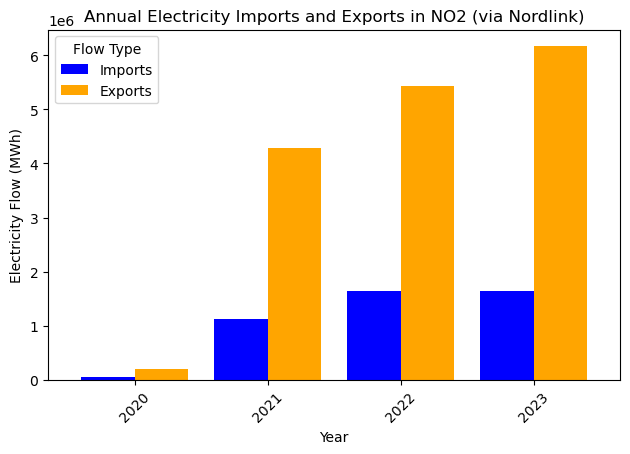

In [39]:
#Creating terms for figure
plt.figure(figsize=(10, 6))
#No need to write the x axis, as the index from dataframe will be used here by default
annual_data.plot.bar(y=['Imports', 'Exports'], stacked=False, width=0.8, rot = 45, color=['blue', 'orange'])

#Customizing our bar plot
plt.title('Annual Electricity Imports and Exports in NO2 (via Nordlink)')
plt.xlabel('Year')
plt.ylabel('Electricity Flow (MWh)')
plt.legend(title="Flow Type")
plt.tight_layout()

#Save the figure as a png file and show figure
plt.savefig('figure_task3.png')
plt.show()

Conclusion: 
As the bar chart shows, NO2 exports considerably more electricity to Germany than they import. Note that the amount of exports/imports in 2020 is reasonably low, due to the fact that NordLink opened on december 9, 2020. From there, the amount of import/export increases rapidly over the years.

TASK 4:

In [40]:
#Read all csv files and concatenate them into one file
dataframes = []
for f in flow_files:
    csv = pd.read_csv(f, delimiter = '\t')
    dataframes.append(csv)
flow_data = pd.concat(dataframes, ignore_index = True)

#Making sure that the 'DateTime' column is in the right format
flow_data['DateTime'] = pd.to_datetime(flow_data['DateTime'])
# Imports: NO2 is InMapCode (importing from Germany)
imports = flow_data[(flow_data['InMapCode'] == 'NO2') & (flow_data['OutMapCode'] == 'DE_LU')]

# Exports: NO2 is OutMapCode (exporting to Germany)
exports = flow_data[(flow_data['OutMapCode'] == 'NO2') & (flow_data['InMapCode'] == 'DE_LU')]


flow_data

,DateTime,InMapCode,OutMapCode,FlowValue
0,2019-01-01 00:00:00,AL,GR,173.00
1,2019-01-01 01:00:00,AL,GR,145.00
2,2019-01-01 02:00:00,AL,GR,145.00
3,2019-01-01 03:00:00,AL,GR,133.00
4,2019-01-01 04:00:00,AL,GR,130.00
...,...,...,...,...
14402341,2023-12-31 19:00:00,XK,RS,418.85
14402342,2023-12-31 20:00:00,XK,RS,411.11
14402343,2023-12-31 21:00:00,XK,RS,485.37
14402344,2023-12-31 22:00:00,XK,RS,469.40


In [41]:
#Set the DateTime index for resampling
imports.set_index('DateTime', inplace=True)
exports.set_index('DateTime', inplace=True)

#Calculate weekly sums for imports and exports by resampling time series data
weekly_imports = imports['FlowValue'].resample('W').sum()
weekly_exports = exports['FlowValue'].resample('W').sum()

#Calculate weekly net exports 
weekly_net_exports = weekly_exports - weekly_imports

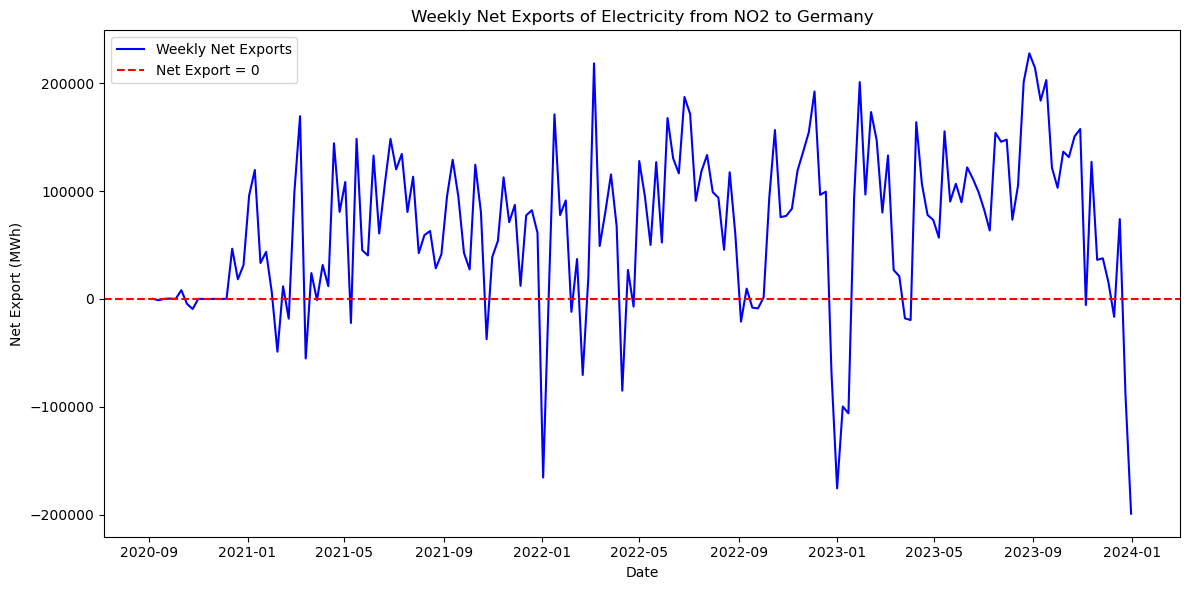

In [42]:
#Plotting and customizing of the figure
plt.figure(figsize=(12, 6))
#No need to write the x axis, as the index from dataframe will be used here by default
plt.plot(weekly_net_exports, label='Weekly Net Exports', color='blue')
plt.axhline(0, color='red', linestyle='--', label='Net Export = 0')

# Customizing the plot
plt.title('Weekly Net Exports of Electricity from NO2 to Germany')
plt.xlabel('Date')
plt.ylabel('Net Export (MWh)')
plt.legend()
plt.tight_layout()

#Saving the figure as png file
plt.savefig('figure_task4.png')
plt.show()

Conclusion:
As the graph shows, NO2 has not always exported more electricity to Germany than we have imported. All the parts of the graph that is located under the horizontal line, reflects a bigger amount of import than export. Example of a time period this happened is 2022-01. The net sum of import is the biggeset usually in January each year (the time of year most civilians use the most electricity for heating). 

TASK 5:

In [43]:
#Doing exact same procedure as in task 4 to calculate weekly net exports
dataframes = []
for f in flow_files:
    csv = pd.read_csv(f, delimiter = '\t')
    dataframes.append(csv)
flow_data = pd.concat(dataframes, ignore_index = True)

flow_data['DateTime'] = pd.to_datetime(flow_data['DateTime'])

imports = flow_data[(flow_data['InMapCode'] == 'NO2') & (flow_data['OutMapCode'] == 'DE_LU')]

exports = flow_data[(flow_data['OutMapCode'] == 'NO2') & (flow_data['InMapCode'] == 'DE_LU')]
imports.set_index('DateTime', inplace=True)
exports.set_index('DateTime', inplace=True)

weekly_imports = imports['FlowValue'].resample('W').sum()
weekly_exports = exports['FlowValue'].resample('W').sum()

weekly_net_exports = weekly_exports - weekly_imports

In [44]:
#Loading in data from 'DayAheadPrices' 
#Initializing empty list to store all csv files, enabling us to concatenate later
datas = []
for f in price_files:
    csv = pd.read_csv(f, delimiter = '\t')
    datas.append(csv)
price_data = pd.concat(datas, ignore_index = True)

# Convert 'DateTime' to datetime format and set as index
price_data['DateTime'] = pd.to_datetime(price_data['DateTime'])
price_data.set_index('DateTime', inplace=True)

# Filter price data for NO2 and Germany (DE_LU) and resample by week
no2_prices = price_data[price_data['MapCode'] == 'NO2']['Price'].resample('W').mean()
ger_prices = price_data[price_data['MapCode'] == 'DE_LU']['Price'].resample('W').mean()

# Calculate weekly average price difference (Germany - NO2)
weekly_price_difference = ger_prices - no2_prices

In [45]:
# Align the two series to ensure they have the same index
aligned_data = pd.concat([weekly_net_exports, weekly_price_difference], axis=1, join='inner')
aligned_data.columns = ['Net Exports', 'Price Difference']

In [46]:
# Calculate the correlation between net exports and price difference
correlation = aligned_data['Net Exports'].corr(aligned_data['Price Difference'])

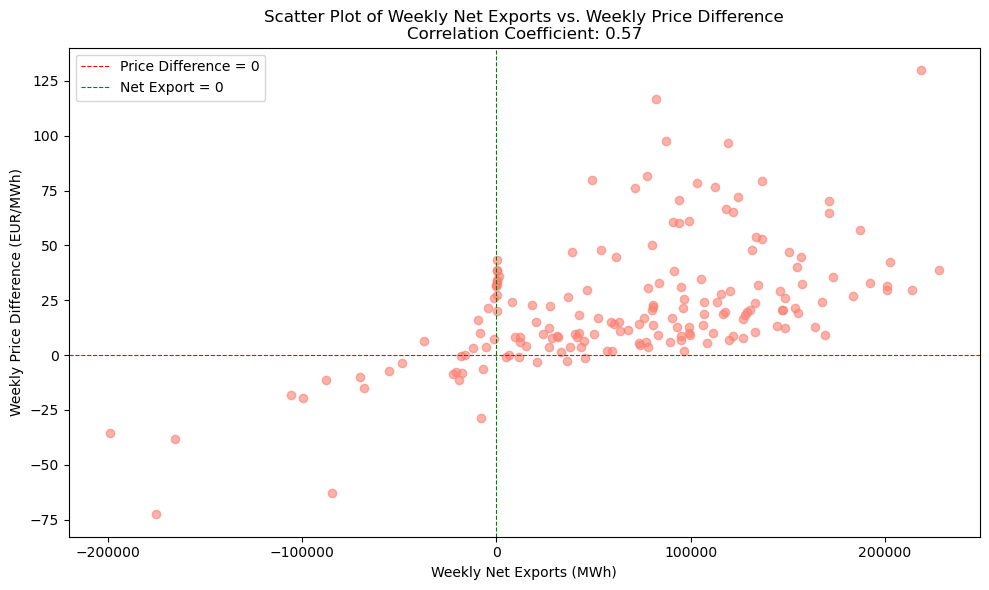

In [47]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(aligned_data['Net Exports'], aligned_data['Price Difference'], color='salmon', alpha=0.6)
#Customizing the scatter plot and adding correlation to the title
plt.title(f'Scatter Plot of Weekly Net Exports vs. Weekly Price Difference\nCorrelation Coefficient: {correlation:.2f}')
plt.xlabel('Weekly Net Exports (MWh)')
plt.ylabel('Weekly Price Difference (EUR/MWh)')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label='Price Difference = 0')
plt.axvline(0, color='green', linestyle='--', linewidth=0.8, label='Net Export = 0')
plt.legend()
plt.tight_layout()
# Save the scatter plot
plt.savefig('figure_task5.png')
plt.show()

Conclusion: 
The correlation coefficient of 0.57 indicates a positive correlation between the weekly sum of net exports and the weekly average price difference. This suggests that as electricity prices in Germany rise, their imports from Norway also tend to increase. The scatter plot supports this relationship, showing that higher price differences generally align with increased imports from Norway.

Notably, there is very little activity when the price difference is high but net exports are negative (indicating Norway is importing more than exporting). Similarly, there is minimal activity when the price difference is negative (meaning prices are lower in Germany), yet Norway is exporting more than importing. This pattern supports the idea that price differences drive export flows, with higher exports typically occurring when prices are higher in Germany than in Norway.

TASK 6:

In completing this assignment, our group has used several online sources to enhance our efficiency and understanding of the different tasks we were to complete. This include sources like previous notes from lectures and workshops, pandas.pydata.org, generative AI and Stack Overflow. 

Official function documentation:
The use of official function documentation (for functions in Pandas and matplotlib) helped us understand certain functions and how to utilize them correctly, E.G. 'Groupby()', 'resample()' and for plotting functions. The documentation provided guidance on function parameters and examples of usage, helping us apply them correctly in the code. 

Stack Overflow: 
We used Stack Overflow in the way of looking up different errors in our initialized code, increasing our understanding of what possibly went wrong where, and how we from there on could improve our code, E.G. ValueErrors.

Notes from Lectures:
By constantly reading through previous lecture and workshop notes, we refreshed our memory in the usage of different functions. Especially when working on the task inclluding a scatter plot, we looked back on previous workshop tasks, and were able to more easily solve this very task. 

Generative AI:
Our group used ChatGPT in clarifying concepts, understand possible coding errors, and seek for relevant guidance on how to approach the tasks. ChatGPT helped us understand how to write different lines of code correctly and more efficiently. However, every time we used ChatGPT, we made sure to understand everything it said, and test it to consider whether it gave us the result we wanted. Overall making sure that we did not use ChatGPT in a way that we did not understand. ChatGPT helped us re-structure our code, for instance in how to calculate weekly sums and calculate correlation and refine the code to make it more readable 


We utilized several sources in our approach of solving this assignment. By reading through previous notes, official documentation and Stack Overflow, we were able to understand how to code in the correct way. Our usage of AI has definitely helped us make our code more readable, efficient and helped us out with problems. Importantly, we thoroughly reviewed and tested all AI-generated suggetions we got, to ensure that we fully understood each solution (line of code) and that the final result from this line align with our expectations. 